In [6]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

data = pd.read_csv("Data/notes_étudiants.csv", sep=',', index_col='id' )
n = data.shape[0]
p = data.shape[1]


# Application de l'ACP

In [7]:
s_scaler = StandardScaler()
scaled_data = s_scaler.fit_transform(data)


In [8]:
print(np.mean(scaled_data,axis=0))

[ 1.31208176e-16  4.37360585e-17 -1.07657990e-16  9.08364293e-17
 -1.95130107e-16 -1.48029737e-16 -9.42007415e-17  1.61486985e-16
 -1.68215610e-16  8.99953512e-17]


In [9]:
print(np.std(scaled_data,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [10]:
pca = PCA()
coords = pca.fit_transform(scaled_data)

In [11]:
print(pca.explained_variance_ratio_)

[0.39895152 0.29268582 0.16848099 0.0951434  0.01518182 0.00992171
 0.00778928 0.00633025 0.0030013  0.00251392]


In [20]:
print(pca.explained_variance_)

[4.11418751 3.01832247 1.73746023 0.98116629 0.15656251 0.10231765
 0.08032697 0.06528068 0.03095086 0.02592482]


In [13]:
eigenvalues = (n-1)/n*pca.explained_variance_
print(eigenvalues)

[3.98951516 2.92685816 1.68480992 0.95143398 0.15181819 0.09921712
 0.07789282 0.06330248 0.03001295 0.02513922]


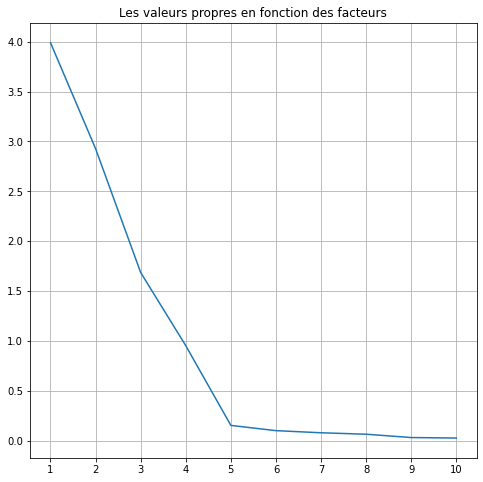

In [21]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xticks(np.arange(11))
axes.plot(range(1,p+1),eigenvalues)
plt.title("Les valeurs propres en fonction des facteurs")
plt.grid()

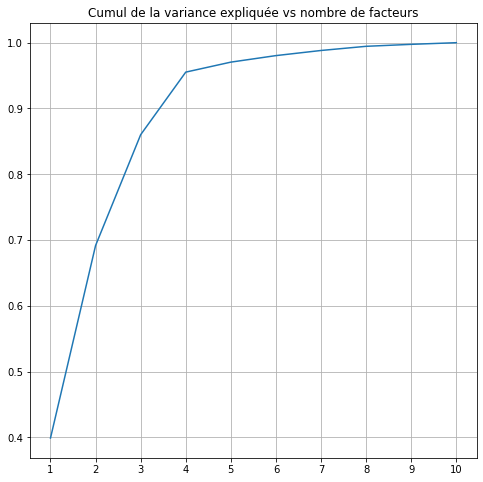

In [15]:
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xticks(np.arange(11))
axes.plot(np.arange(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumul de la variance expliquée vs nombre de facteurs") 
plt.grid()

In [16]:
b_i = 1/np.arange(p,0,-1)
print(b_i)

[0.1        0.11111111 0.125      0.14285714 0.16666667 0.2
 0.25       0.33333333 0.5        1.        ]


In [17]:
cumul_b_i = np.cumsum(b_i)
cumul_b_i = cumul_b_i[::-1]
print(pd.DataFrame({'Inertie':eigenvalues,'Seuils':cumul_b_i}))
 

    Inertie    Seuils
0  3.989515  2.928968
1  2.926858  1.928968
2  1.684810  1.428968
3  0.951434  1.095635
4  0.151818  0.845635
5  0.099217  0.645635
6  0.077893  0.478968
7  0.063302  0.336111
8  0.030013  0.211111
9  0.025139  0.100000


In [18]:
np.min(coords[:,1])

-3.235681688284005

In [19]:
np.max(coords[:,1])

5.0540241193016655